<a href="https://colab.research.google.com/github/quadribello/Hamoye/blob/master/Wrangling_Time_Series_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0, 0.5, 'Passengers')

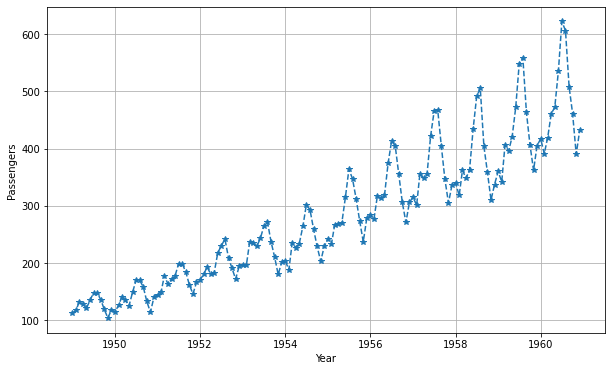

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv" )
df[ "Month" ] = pd.to_datetime(df[ "Month" ]) #convert column to datetime
df.set_index( "Month" , inplace= True )
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' ) 

In [4]:
# check for missing values
df.isnull().values.any()

False

In [5]:
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [6]:
# Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [7]:
# Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [8]:
# Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [9]:
df_copy_LIB = df_copy.interpolate(method='linear',limit_direction='backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

## Downsampling and Upsampling

In [12]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()

Text(0.5, 1.0, 'Downsampled Data')

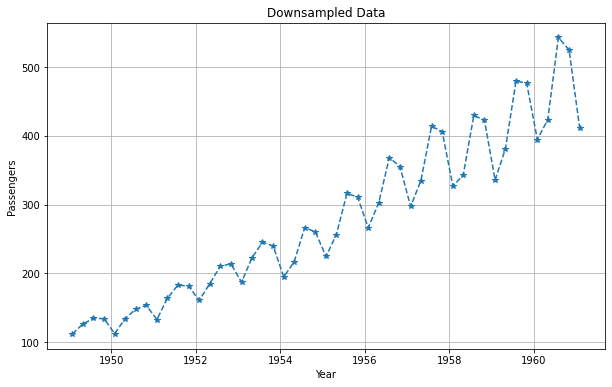

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Downsampled Data')

Text(0.5, 1.0, 'Upsampled Data')

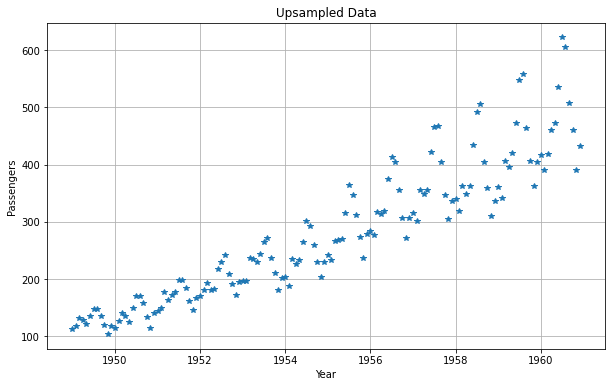

In [15]:
#Upsample to daily data points
df_daily = df.resample('D').mean()
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Upsampled Data')

In [16]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()